In [37]:
import pandas as pd
import requests
import json
import numpy as np 
from nltk.tokenize import RegexpTokenizer # devide the words 
from collections import Counter #count the number of word for each list 
import matplotlib.pyplot as plt


# Understand the data

In [38]:
data = pd.read_excel('FinalTweets.xlsx') 

In [39]:
tokenizer = RegexpTokenizer(r'\w+')
data["tokens"] = data["cleanTweets"].apply(tokenizer.tokenize)

In [40]:
data.head()

,Unnamed: 0,Tweets,Username,Mentions,To,cleanTweets,Hour,Day,Month,Year,tokens
0,0,ما وصلني شي من الي وعدتوه بالخاص,Talal_A_M,Not given,hunger_care,ما وصلني شي من الي وعدتوه بالخاص,23,19,12,2019,"[ما, وصلني, شي, من, الي, وعدتوه, بالخاص]"
1,14,انا قبل شوي طلبت بالموقع وطريقة الدفع عن طريق ...,mjoodh_0121,Not given,hunger_care,انا قبل شوي طلبت بالموقع وطريقة الدفع عن طريق ...,23,19,12,2019,"[انا, قبل, شوي, طلبت, بالموقع, وطريقة, الدفع, ..."
2,20,تاخر الطلب وارسلت لكم وهذا الرد وبعد ماكلمت ال...,rn21212121,Not given,hunger_care,تاخر الطلب وارسلت لكم وهذا الرد وبعد ماكلمت ال...,22,19,12,2019,"[تاخر, الطلب, وارسلت, لكم, وهذا, الرد, وبعد, م..."
3,22,نتمنى تشوفون وتتاكدون من كلامي لاني كلمت وشفت ...,rn21212121,Not given,hunger_care,نتمنى تشوفون وتاكدون من كلامي لاني كلمت وشفت ب...,22,19,12,2019,"[نتمنى, تشوفون, وتاكدون, من, كلامي, لاني, كلمت..."
4,28,هذا هو انا الحين مابي الطلب ابي الفلوس الي راح...,joj_a1993,Not given,hunger_care,هذا هو انا الحين مابي الطلب ابي الفلوس الي راح...,22,19,12,2019,"[هذا, هو, انا, الحين, مابي, الطلب, ابي, الفلوس..."


In [41]:
all_words = [word for tokens in data["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in data["tokens"]]

VOCAB = sorted(list(set(all_words)))

print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

35414 words total, with a vocabulary size of 7397
Max sentence length is 58


In [42]:
# count the number of words
word_counter = Counter(all_words)

In [43]:
# store the top 20 words in a new data frame
lst = word_counter.most_common(10)
word_df = pd.DataFrame(lst, columns = ['Word', 'Count'])

## Top used words in customers tweets

In [44]:
word_df.set_index('Word', inplace=True)

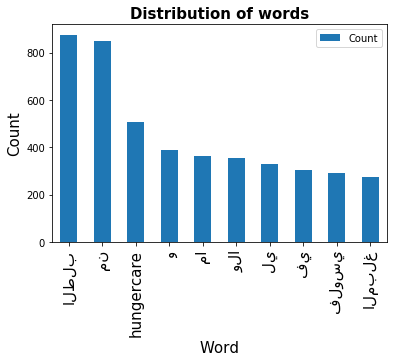

In [45]:
# visualize the top 20 words

fig, ax = plt.subplots()

ax.tick_params(axis='x', labelsize=15,rotation=45)
ax.tick_params(axis='y', labelsize=10)

ax.set_xlabel('Word', fontsize=15)
ax.set_ylabel('Count' , fontsize=15)
ax.set_title('Distribution of words', fontsize=15, fontweight='bold')

word_df.plot(ax=ax, kind='bar')

In [46]:
word_df.head(10)

,Count
Word,
الطلب,875
من,847
hungercare,507
و,387
ما,361
ولا,353
لي,328
في,302
فلوسي,290


In [47]:
 For_words= [ word for tokens in data["tokens"] for word in tokens]

In [48]:
for_word_counter = Counter(For_words)

In [49]:
for_word_counter.most_common(10)

[('الطلب', 875),
 ('من', 847),
 ('hungercare', 507),
 ('و', 387),
 ('ما', 361),
 ('ولا', 353),
 ('لي', 328),
 ('في', 302),
 ('فلوسي', 290),
 ('المبلغ', 274)]

In [50]:
# stop words
ignore = {'في','هذا','عن','من',
          'او','بس','الا','ان','و', 'الي', 'انا','ولا','او','لي','على','مع','ما'}

In [51]:
# remove stop words from the list of words
for word in ignore:
    if word in for_word_counter:
        del for_word_counter[word]

In [52]:
for_word_counter.most_common(10)

[('الطلب', 875),
 ('hungercare', 507),
 ('فلوسي', 290),
 ('المبلغ', 274),
 ('طلبت', 266),
 ('المطعم', 216),
 ('التوصيل', 197),
 ('تم', 195),
 ('الفلوس', 179),
 ('التطبيق', 169)]

## Least common words used in customers tweets


In [53]:
 For_words= [ word for tokens in data["tokens"] for word in tokens]

In [54]:
for_word_counter = Counter(For_words)

In [55]:
for_word_counter.most_common()[-10:]

[('إسترداده', 1),
 ('مازالت', 1),
 ('رسايل', 1),
 ('لسحب', 1),
 ('مخترق', 1),
 ('هنقرستيشنمخترق', 1),
 ('لتقديم', 1),
 ('واسترجاع', 1),
 ('واقل', 1),
 ('حطر', 1)]

In [56]:
# stop words
ignore = {'في','هذا','عن','من',
          'او','بس','الا','ان','و', 'الي', 'انا','ولا','او','لي','على','مع','مازالت','حطر','ما'}

In [57]:
# remove stop words from the list of words
for word in ignore:
    if word in for_word_counter:
        del for_word_counter[word]

In [58]:
for_word_counter.most_common()[-10:]

[('الإلكتروني', 1),
 ('بقدرة', 1),
 ('إسترداده', 1),
 ('رسايل', 1),
 ('لسحب', 1),
 ('مخترق', 1),
 ('هنقرستيشنمخترق', 1),
 ('لتقديم', 1),
 ('واسترجاع', 1),
 ('واقل', 1)]

# Classify data to positive, negative and neutrul using Mazajak 

In [24]:
def predict(sentence):
    url = "http://mazajak.inf.ed.ac.uk:8000/api/predict"
    to_sent = {'data': sentence}
    data = json.dumps(to_sent)
    headers = {'content-type': 'application/json'}
    # sending get request and saving the response as response object
    response = requests.post(url=url, data=data, headers=headers)

    prediction = json.loads(response.content)['data']

    return prediction

In [25]:
data

,Unnamed: 0,Tweets,Username,Mentions,To,cleanTweets,Hour,Day,Month,Year,tokens
0,0,ما وصلني شي من الي وعدتوه بالخاص,Talal_A_M,Not given,hunger_care,ما وصلني شي من الي وعدتوه بالخاص,23,19,12,2019,"[ما, وصلني, شي, من, الي, وعدتوه, بالخاص]"
1,14,انا قبل شوي طلبت بالموقع وطريقة الدفع عن طريق ...,mjoodh_0121,Not given,hunger_care,انا قبل شوي طلبت بالموقع وطريقة الدفع عن طريق ...,23,19,12,2019,"[انا, قبل, شوي, طلبت, بالموقع, وطريقة, الدفع, ..."
2,20,تاخر الطلب وارسلت لكم وهذا الرد وبعد ماكلمت ال...,rn21212121,Not given,hunger_care,تاخر الطلب وارسلت لكم وهذا الرد وبعد ماكلمت ال...,22,19,12,2019,"[تاخر, الطلب, وارسلت, لكم, وهذا, الرد, وبعد, م..."
3,22,نتمنى تشوفون وتتاكدون من كلامي لاني كلمت وشفت ...,rn21212121,Not given,hunger_care,نتمنى تشوفون وتاكدون من كلامي لاني كلمت وشفت ب...,22,19,12,2019,"[نتمنى, تشوفون, وتاكدون, من, كلامي, لاني, كلمت..."
4,28,هذا هو انا الحين مابي الطلب ابي الفلوس الي راح...,joj_a1993,Not given,hunger_care,هذا هو انا الحين مابي الطلب ابي الفلوس الي راح...,22,19,12,2019,"[هذا, هو, انا, الحين, مابي, الطلب, ابي, الفلوس..."
...,...,...,...,...,...,...,...,...,...,...,...
1913,9975,للاسف ماعتدي رقم الطلب لانه الغي تماما من التط...,szailaei,Not given,hunger_care,لاسف ماعتدي رقم الطلب لانه الغي تماما من التطب...,10,2,2,2020,"[لاسف, ماعتدي, رقم, الطلب, لانه, الغي, تماما, ..."
1914,9980,طلبت وبعد ماتم الدفع قفلت الدفع الإلكتروني، وب...,uniQuexxz,Not given,hunger_care,طلبت وبعد ماتم الدفع قفلت الدفع الإلكتروني وبع...,10,2,2,2020,"[طلبت, وبعد, ماتم, الدفع, قفلت, الدفع, الإلكتر..."
1915,9983,@hunger_care طلبت قبل قليل وتم خصم المبلغ من ا...,szailaei,@hunger_care,Not given,hungercare طلبت قبل قليل وتم خصم المبلغ من الح...,10,2,2,2020,"[hungercare, طلبت, قبل, قليل, وتم, خصم, المبلغ..."
1916,9984,نفس المشكله انا مدري وش فيكم علي دايم اطلب و ا...,ShaikhaAli92,Not given,hunger_care,نفس المشكله انا مدري وش فيكم علي دايم اطلب و ا...,10,2,2,2020,"[نفس, المشكله, انا, مدري, وش, فيكم, علي, دايم,..."


In [26]:
data['Sentiment']= ""

In [ ]:
i = 0
for tweet in data['cleanTweets']:
    data['Sentiment'].iloc[i]=predict(tweet)
    i = i + 1

In [ ]:
data.head()

# Models :

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics  import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MultiLabelBinarizer

In [60]:
# remove the "Neutral" class
data = data[data['Sentiment'] != "neutral"]

KeyError: 'Sentiment'

In [31]:
# change values to numeric
data['Sentiment'] = data['Sentiment'].map({'positive': 1, 'negative': 0}) 

In [32]:
# idneitfy the data and the labels
newData= data['cleanTweets']
target= data['Sentiment']

In [33]:
# Use TfidfVectorizer for feature extraction (TFIDF to convert textual data to numeric form):
tf_vec = TfidfVectorizer()
X = tf_vec.fit_transform(newData)
X.shape

(1813, 7204)

In [35]:
# Training Phase
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.50, random_state=0)

## 1- Naive Bayes:

In [62]:
# create the classifer and fit the training data and lables
classifier_nb = MultinomialNB().fit(X_train.todense(),y_train)

print("MultinomialNB accuracy: %.2f"%classifier_nb.score(X_test.todense(), y_test))

# #do a 10 fold cross-validation 
results_nb = cross_val_score(classifier_nb, X.todense(),target, cv=10)
print("\n10-fold cross-validation:")
print(results_nb)

print("The average accuracy of the MultinomialNB classifier is : %.2f" % np.mean(results_nb))

print("\nConfusion matrix of the MultinomialNB classifier:")
predicted_nb = classifier_nb.predict(X_test.todense())
print(confusion_matrix(y_test,predicted_nb))


print("\nClassification_report of MultinomialNB classifier:")
print(classification_report(y_test,predicted_nb))
print("----------------------------------------------------------------------------")

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [63]:
# calculate the fpr and tpr for all thresholds of the classification
probs = classifier_nb.predict_proba(X_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

NameError: name 'classifier_nb' is not defined

NameError: name 'fpr' is not defined

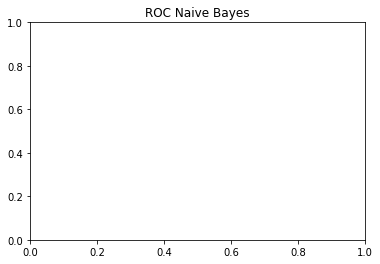

In [64]:
plt.title("ROC Naive Bayes")
plt.plot(fpr , tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1] , [0, 1] , 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show

## 2- SVM:

In [65]:
# create the classifer and fit the training data and lables
classifier_svm = svm.SVC(kernel='linear', C=1, probability=True).fit(X_train,y_train)

print("SVM accuracy: %.2f"%classifier_svm.score(X_test, y_test))

#do a 10 fold cross-validation 
results_svm = cross_val_score(classifier_svm, X,target, cv=10)
print("\n10-fold cross-validation:")
print(results_svm)

print("The average accuracy of the SVM classifier is : %.2f" % np.mean(results_svm))

print("\nConfusion matrix of the SVM classifier:")
predicted_svm = classifier_svm.predict(X_test)
print(confusion_matrix(y_test,predicted_svm))


print("\nClassification_report of SVM classifier:")
print(classification_report(y_test,predicted_svm))
print("----------------------------------------------------------------------------")

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# calculate the fpr and tpr for all thresholds of the classification
probs = classifier_svm.predict_proba(X_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

In [ ]:
plt.title("ROC SVM")
plt.plot(fpr , tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1] , [0, 1] , 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show

## 3- Logistic:

In [ ]:
classifier_log =  LogisticRegression().fit(X_train,y_train)

In [ ]:
print("Logisitic Accuracy: %.2F"%classifier_log.score(X_test, y_test))
results_log = cross_val_score(classifier_log, X,target, cv=10)


print("\n10-fold cross-validation:")
print(results_log)


print("The average accuracy of the Logisitic classifier is : %.2f" % np.mean(results_log))
print("\nConfusion matrix of the Logisitic classifier:")
predicted_log= classifier_log.predict(X_test)
print(confusion_matrix(y_test,predicted_log))


print("\nClassification_report of Logisitic classifier:")
print(classification_report(y_test,predicted_log))
print("----------------------------------------------------------------------------")

In [ ]:
# calculate the fpr and tpr for all thresholds of the classification

probs = classifier_log.predict_proba(X_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

In [ ]:
# polt AUC
plt.title('ROC Logisitic ')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Classify tweets to order , payment and delivery problems 

In [ ]:
# change the seeting of the cells to show the entire content of coulmn ( eexpand the size of coulmn)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
data["tokens"] = data["cleanTweets"].apply(tokenizer.tokenize)
all_words = [word for tokens in data["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in data["tokens"]]

VOCAB = sorted(list(set(all_words)))

In [ ]:
 For_words= [ word for tokens in data["tokens"] for word in tokens]

In [ ]:
for_word_counter = Counter(For_words)

In [ ]:
data['Category']=""

In [ ]:
filter1 = data['tokens']

categoryList = []
for x in filter1:
    if ("بارد" in x or "بالخاص" in x or "خدمة" in x or
        "الغاء" in x  or "تكنسلت" in x  or "اطلب" in x or "اطلب" in x or "اطلب" in x
       or "الأكل" in x or "ناقص" in x or "الخدمة" in x or "طلبي" in x or "جودة" in x 
       or "الجودة" in x or "وجبة" in x or "طلبت" in x or "نتيجة" in x or "شكواي" in x 
       or "حسبي" in x or "فشل" in x or "وجبتي" in x or "المطعم" in x or "خايس" in x
       or "محيوس" in x or "جاء" in x or "غلط" in x ):
        categoryList.append('order')
        
        
    elif ("تاخر" in x or "السائق" in x or "السواق" in x or
        "واسلوبه" in x  or "المندوب" in x  or "وقت" in x or "التوصيل" in x or "اكثر" in x
       or "بالسائقين" in x or "بالغلط" in x or "لعنوان" in x or "عنوان" in x or "ثاني" in x 
       or "توصيل" in x or "مشوار" in x or "موظفكم" in x or "ساعه" in x or "لمندوبين" in x 
       or "ولسى" in x or "المندوب" in x or "المندوبين" in x or "ادب" in x or "بالتوصيل" in x
       or "التسليم" in x or "استلم" in x or "دقيقه" in x or "دقيقة" in x):
        categoryList.append('Deliviry')
        
    else: categoryList.append('Payment')
       

    
data['Category']= categoryList

# Models:

In [ ]:
# change values to numeric
data['Category'] = data['Category'].map({'Payment': 1, 'Deliviry': 0, 'order': 2})

In [ ]:
# idneitfy the data and the labels
newData= data['tokens']
target= data['Category']

In [ ]:
# Use TfidfVectorizer for feature extraction (TFIDF to convert textual data to numeric form):
tf_vec = MultiLabelBinarizer()
X = tf_vec.fit_transform(newData)

X.shape

In [ ]:
# Training Phase
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.5, random_state=0)

## 1- Naive Bayes:

In [ ]:
classifier_nb = MultinomialNB().fit(X_train,y_train)

print("MultinomialNB accuracy: %.2f"%classifier_nb.score(X_test, y_test))
results_nb = cross_val_score(classifier_nb, X,target, cv=10)

print("\n10-fold cross-validation:")
print(results_nb)

print("The average accuracy of the MultinomialNB classifier is : %.2f" % np.mean(results_nb))

print("\nConfusion matrix of the MultinomialNB classifier:")
predicted_nb = classifier_nb.predict(X_test)
print(confusion_matrix(y_test,predicted_nb))


print("\nClassification_report of MultinomialNB classifier:")
print(classification_report(y_test,predicted_nb))
print("----------------------------------------------------------------------------")

## 2- SVM:

In [ ]:
# create the classifer and fit the training data and lables
classifier_svm = svm.SVC(kernel='linear', C=1, probability=True).fit(X_train,y_train)

print("SVM accuracy: %.2f"%classifier_svm.score(X_test, y_test))

#do a 10 fold cross-validation 
results_svm = cross_val_score(classifier_svm, X,target, cv=10)
print("\n10-fold cross-validation:")
print(results_svm)

print("The average accuracy of the SVM classifier is : %.2f" % np.mean(results_svm))

print("\nConfusion matrix of the SVM classifier:")
predicted_svm = classifier_svm.predict(X_test)
print(confusion_matrix(y_test,predicted_svm))


print("\nClassification_report of SVM classifier:")
print(classification_report(y_test,predicted_svm))
print("----------------------------------------------------------------------------")

## 3- Logistic:

In [ ]:
classifier_log =  LogisticRegression().fit(X_train,y_train)

In [ ]:
print("Logisitic Accuracy: %.2F"%classifier_log.score(X_test, y_test))
results_log = cross_val_score(classifier_log, X,target, cv=10)


print("\n10-fold cross-validation:")
print(results_log)


print("The average accuracy of the Logisitic classifier is : %.2f" % np.mean(results_log))
print("\nConfusion matrix of the Logisitic classifier:")
predicted_log= classifier_log.predict(X_test)
print(confusion_matrix(y_test,predicted_log))


print("\nClassification_report of Logisitic classifier:")
print(classification_report(y_test,predicted_log))
print("----------------------------------------------------------------------------")

# Show negative and positive tweets of the months of 2019 and 2020

In [ ]:
# data['Sentiment'] = data['Sentiment'].map({ 1: 'positive', 0 : 'negative'}) 
airline_sentiment = data.groupby(['Month', 'Sentiment']).Sentiment.count().unstack()
airline_sentiment.plot(kind='line',figsize=(20, 20))

In [ ]:
data['Category'] = data['Category'].map({ 1: 'Payment', 0 : 'Deliviry', 2: 'order'}) 
airline_sentiment = data.groupby(['Month', 'Category']).Category.count().unstack()
airline_sentiment.plot(kind='line',figsize=(20, 20))

In [ ]:
data.to_csv("ClassificationPhaseFinalTweets.csv",index=False)

# Data Visalization and Findings